In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
%matplotlib inline

In [4]:
df = pd.read_excel('IPEDS_data.csv')

In [5]:
df.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [6]:
print('The data has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The data has 1534 rows and 145 columns


In [7]:
df.describe()

,ID number,year,Longitude location of institution,Latitude location of institution,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
count,1534.000000,1534.0,1534.000000,1534.000000,1377.000000,1377.000000,1377.000000,1257.000000,1259.000000,1169.000000,...,1492.00000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,516.000000,9.600000e+02
mean,189091.037810,2013.0,-88.342338,38.729993,6391.193174,3554.880174,1043.046478,53.927605,53.085782,470.340462,...,41.47185,40.764075,15.418901,35.384718,70.335121,64.959786,64.180295,7.553619,9459.463178,6.503032e+04
std,58641.915456,0.0,14.838804,4.832832,8787.469171,4309.457606,1285.165519,34.385164,31.658662,68.368390,...,18.88068,18.560557,14.091423,21.897744,29.463324,19.143070,19.337354,7.706674,19398.443224,1.773784e+05
min,100654.000000,2013.0,-158.062444,19.701854,0.000000,0.000000,0.000000,0.000000,0.000000,310.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.000000,4.200000e+01
25%,153148.500000,2013.0,-94.576341,35.348340,1488.000000,950.000000,287.000000,16.000000,26.000000,430.000000,...,28.00000,27.000000,6.000000,18.000000,48.000000,54.000000,53.000000,2.000000,2080.000000,8.391000e+03
50%,186508.000000,2013.0,-84.514218,39.946096,3350.000000,2056.000000,538.000000,65.000000,49.000000,460.000000,...,40.00000,39.000000,12.000000,34.000000,78.000000,68.000000,67.000000,6.000000,4283.000000,1.870400e+04
75%,215730.000000,2013.0,-77.207136,41.984929,7016.000000,4203.000000,1246.000000,86.000000,87.000000,500.000000,...,51.25000,51.000000,20.250000,50.000000,98.000000,79.000000,78.000000,11.000000,8715.500000,4.505250e+04
max,456490.000000,2013.0,-67.456534,64.857053,72676.000000,35815.000000,10241.000000,100.000000,100.000000,720.000000,...,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,83.000000,213079.000000,2.505435e+06


### Working with missing values

In [8]:
df.isnull().sum().sort_values(ascending=False)

Endowment assets (year end) per FTE enrollment (GASB)      1018
SAT Writing 25th percentile score                           820
SAT Writing 75th percentile score                           820
Number of first-time undergraduates - foreign countries     623
Percent of first-time undergraduates - out-of-state         623
                                                           ... 
Level of institution                                          0
Control of institution                                        0
Historically Black College or University                      0
Tribal college                                                0
State abbreviation                                            0
Length: 145, dtype: int64

In [9]:
percent_na = (df.isna().sum() / len(df)) * 100

Text(0, 0.5, '% of NaN elements')

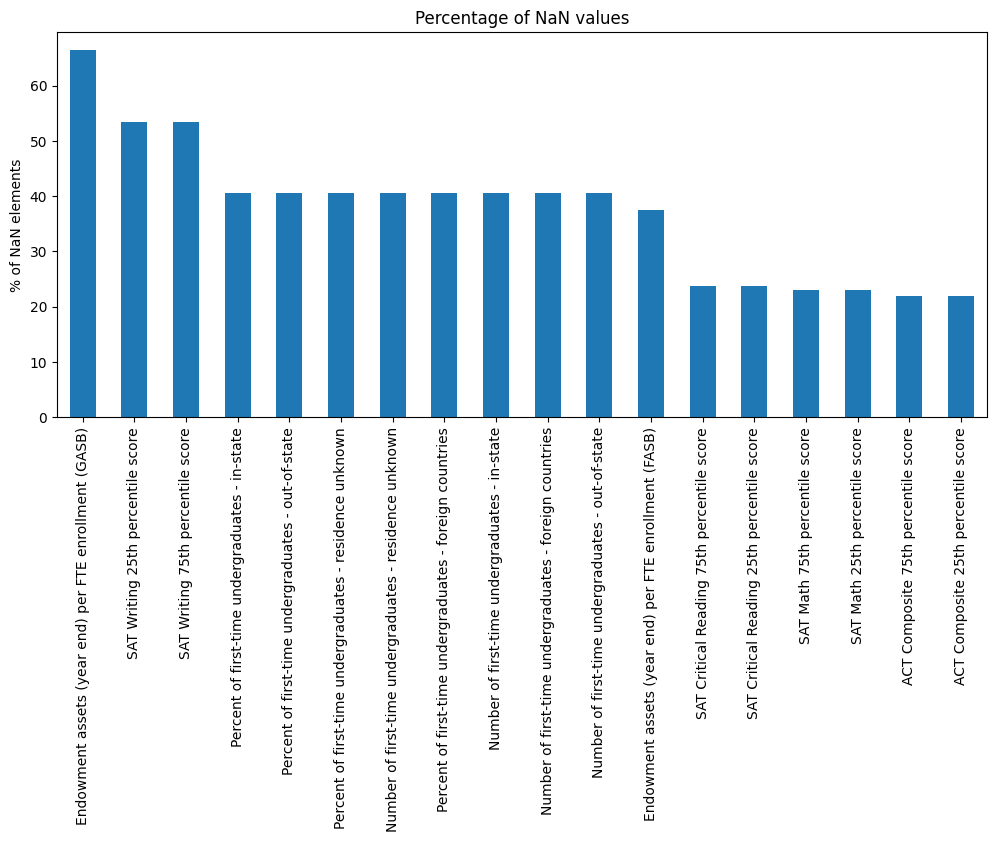

In [10]:
percent_na[percent_na >= 20].sort_values(ascending=False).plot.bar(title='Percentage of NaN values',figsize=(12,5))
plt.ylabel('% of NaN elements')

In [11]:
percent_na[percent_na >= 20]

SAT Critical Reading 25th percentile score                  23.794003
SAT Critical Reading 75th percentile score                  23.794003
SAT Math 25th percentile score                              22.946545
SAT Math 75th percentile score                              22.946545
SAT Writing 25th percentile score                           53.455020
SAT Writing 75th percentile score                           53.455020
ACT Composite 25th percentile score                         21.838331
ACT Composite 75th percentile score                         21.838331
Number of first-time undergraduates - in-state              40.612777
Percent of first-time undergraduates - in-state             40.612777
Number of first-time undergraduates - out-of-state          40.612777
Percent of first-time undergraduates - out-of-state         40.612777
Number of first-time undergraduates - foreign countries     40.612777
Percent of first-time undergraduates - foreign countries    40.612777
Number of first-time

In [12]:
to_drop = ['SAT Critical Reading 25th percentile score',
'SAT Critical Reading 75th percentile score',
'SAT Math 25th percentile score',
'SAT Math 75th percentile score',
'SAT Writing 25th percentile score',
'SAT Writing 75th percentile score',
'ACT Composite 25th percentile score',
'ACT Composite 75th percentile score',
'Number of first-time undergraduates - in-state',
'Percent of first-time undergraduates - in-state',
'Number of first-time undergraduates - out-of-state',
'Percent of first-time undergraduates - out-of-state',
'Number of first-time undergraduates - foreign countries',
'Percent of first-time undergraduates - foreign countries',
'Number of first-time undergraduates - residence unknown',
'Percent of first-time undergraduates - residence unknown',
'Endowment assets (year end) per FTE enrollment (GASB)',
'Endowment assets (year end) per FTE enrollment (FASB)']

In [13]:
df_uni = df.copy()

In [14]:
df_uni.drop(to_drop, axis=1, inplace=True)

In [15]:
df_uni.columns.to_list()

['ID number',
 'Name',
 'year',
 'ZIP code',
 'Highest degree offered',
 'County name',
 'Longitude location of institution',
 'Latitude location of institution',
 'Religious affiliation',
 'Offers Less than one year certificate',
 'Offers One but less than two years certificate',
 "Offers Associate's degree",
 'Offers Two but less than 4 years certificate',
 "Offers Bachelor's degree",
 'Offers Postbaccalaureate certificate',
 "Offers Master's degree",
 "Offers Post-master's certificate",
 "Offers Doctor's degree - research/scholarship",
 "Offers Doctor's degree - professional practice",
 "Offers Doctor's degree - other",
 'Offers Other degree',
 'Applicants total',
 'Admissions total',
 'Enrolled total',
 'Percent of freshmen submitting SAT scores',
 'Percent of freshmen submitting ACT scores',
 'Estimated enrollment, total',
 'Estimated enrollment, full time',
 'Estimated enrollment, part time',
 'Estimated undergraduate enrollment, total',
 'Estimated undergraduate enrollment, full

In [16]:
columns=['Name', 
        'year', 
        'Highest degree offered', 
        "Offers Bachelor's degree",
        "Offers Master's degree",
        "Offers Doctor's degree - research/scholarship",
        "Offers Doctor's degree - professional practice", 
        'Applicants total',
        'Admissions total', 
        'Enrolled total', 
        'Estimated enrollment, total',
        'Tuition and fees, 2013-14',
        'Total price for in-state students living on campus 2013-14',
        'Total price for out-of-state students living on campus 2013-14',
        'State abbreviation', 'Control of institution', 
        'Total  enrollment',
        'Full-time enrollment', 
        'Part-time enrollment',
        'Undergraduate enrollment', 
        'Graduate enrollment',
        'Full-time undergraduate enrollment',
        'Part-time undergraduate enrollment',
        'Percent of total enrollment that are women',
        'Percent of undergraduate enrollment that are women',
        'Percent of graduate enrollment that are women',
        'Graduation rate - Bachelor degree within 4 years, total',
        'Graduation rate - Bachelor degree within 5 years, total',
        'Graduation rate - Bachelor degree within 6 years, total',
       ]

In [17]:
df_uni = df_uni[columns]

In [18]:
df_uni.head()

,Name,year,Highest degree offered,Offers Bachelor's degree,Offers Master's degree,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Applicants total,Admissions total,Enrolled total,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,5521.0,1104.0,...,4051.0,969.0,3799.0,252.0,55.0,51.0,69.0,10.0,23.0,29.0
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,4934.0,1773.0,...,11502.0,7066.0,8357.0,3145.0,61.0,58.0,64.0,29.0,46.0,53.0
2,Amridge University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,...,322.0,309.0,202.0,120.0,58.0,61.0,55.0,0.0,0.0,67.0
3,University of Alabama in Huntsville,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.0,1656.0,651.0,...,5696.0,1680.0,4237.0,1459.0,44.0,44.0,43.0,16.0,37.0,48.0
4,Alabama State University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.0,5251.0,1479.0,...,5356.0,719.0,4872.0,484.0,61.0,59.0,71.0,9.0,19.0,25.0


In [19]:
df_uni.isnull().sum()

Name                                                                0
year                                                                0
Highest degree offered                                              0
Offers Bachelor's degree                                            2
Offers Master's degree                                              2
Offers Doctor's degree - research/scholarship                       2
Offers Doctor's degree - professional practice                      2
Applicants total                                                  157
Admissions total                                                  157
Enrolled total                                                    157
Estimated enrollment, total                                         2
Tuition and fees, 2013-14                                          37
Total price for in-state students living on campus 2013-14        134
Total price for out-of-state students living on campus 2013-14    134
State abbreviation  

In [20]:
df_uni.loc[df_uni['Total  enrollment'].isnull()]

,Name,year,Highest degree offered,Offers Bachelor's degree,Offers Master's degree,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Applicants total,Admissions total,Enrolled total,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
257,University of North Georgia,2013,Doctor's degree - professional practice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,Texas A & M University-Galveston,2013,Doctor's degree - research/scholarship,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
uni_drop1 = df_uni[df_uni['Name'] == 'University of North Georgia'].index[0]
uni_drop1

257

In [22]:
uni_drop2 = df_uni[df_uni['Name'] == 'Texas A & M University-Galveston'].index[0]
uni_drop2

1308

In [23]:
df_uni = df_uni.drop([uni_drop1, uni_drop1], axis=0)

In [24]:
df_uni.describe()

,year,Applicants total,Admissions total,Enrolled total,"Estimated enrollment, total","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,Total enrollment,Full-time enrollment,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
count,1533.0,1377.000000,1377.000000,1377.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1532.000000,...,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1522.000000,1269.000000,1476.000000,1476.000000,1476.000000
mean,2013.0,6391.193174,3554.880174,1043.046478,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5371.494125,...,5532.885117,1537.229112,4507.738903,1025.146214,57.911227,57.169514,63.109535,37.450542,49.788618,53.189024
std,0.0,8787.469171,4309.457606,1285.165519,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7474.494963,...,7242.649546,2765.197979,6042.192662,2121.495422,11.784477,11.886220,14.147092,21.949856,20.256726,19.102511
min,2013.0,0.000000,0.000000,0.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,1488.000000,950.000000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1199.000000,...,1328.000000,46.750000,1089.500000,87.000000,52.000000,52.000000,55.000000,20.000000,36.000000,40.000000
50%,2013.0,3350.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2328.000000,...,2487.500000,471.000000,2066.000000,320.500000,58.000000,57.000000,64.000000,34.000000,49.000000,52.500000
75%,2013.0,7016.000000,4203.000000,1246.000000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6080.750000,...,6394.000000,1737.000000,5207.500000,1082.250000,63.000000,62.000000,72.000000,52.250000,63.000000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,...,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [25]:
df_uni.replace(0, np.nan, inplace=True)

In [26]:
df_uni.describe()

,year,Applicants total,Admissions total,Enrolled total,"Estimated enrollment, total","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,Total enrollment,Full-time enrollment,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
count,1533.0,1376.000000,1376.000000,1376.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1530.000000,...,1522.000000,1269.000000,1519.000000,1495.000000,1529.000000,1518.000000,1268.000000,1457.000000,1468.000000,1469.000000
mean,2013.0,6395.837936,3557.463663,1043.804506,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5378.515686,...,5569.237845,1855.819543,4546.317314,1050.517726,58.024853,57.320158,63.159306,37.938916,50.059946,53.442478
std,0.0,8788.972944,4309.957540,1285.324785,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7476.855128,...,7252.465825,2939.482145,6053.531083,2141.386454,11.512998,11.533174,14.041089,21.668924,19.974502,18.790730
min,2013.0,4.000000,4.000000,2.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,1.000000,...,11.000000,1.000000,1.000000,2.000000,3.000000,8.000000,9.000000,1.000000,2.000000,2.000000
25%,2013.0,1491.750000,951.500000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1200.750000,...,1347.000000,216.000000,1119.500000,98.500000,52.000000,52.000000,55.000000,21.000000,36.000000,41.000000
50%,2013.0,3360.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2331.500000,...,2516.500000,728.000000,2087.000000,336.000000,58.000000,57.000000,64.000000,34.000000,49.000000,53.000000
75%,2013.0,7020.500000,4207.500000,1246.500000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6094.250000,...,6443.000000,2180.000000,5251.500000,1101.500000,63.000000,62.000000,72.000000,53.000000,63.250000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,...,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [27]:
df_uni[['Name', 'Applicants total']].sort_values(by='Applicants total').head(20)

,Name,Applicants total
1343,Goddard College,4.0
331,Shimer College,28.0
1500,Trine University-Regional/Non-Traditional Camp...,33.0
1479,Brandman University,34.0
1046,Marylhurst University,36.0
1476,Antioch University-Seattle,42.0
1354,Sterling College,49.0
195,Carlos Albizu University-Miami,58.0
1485,Remington College-Honolulu Campus,63.0
1490,Everglades University,67.0


## EDA

In [28]:
top_20 = df_uni[['Name', 'Applicants total']].sort_values(by='Applicants total', ascending=False).head(20)

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


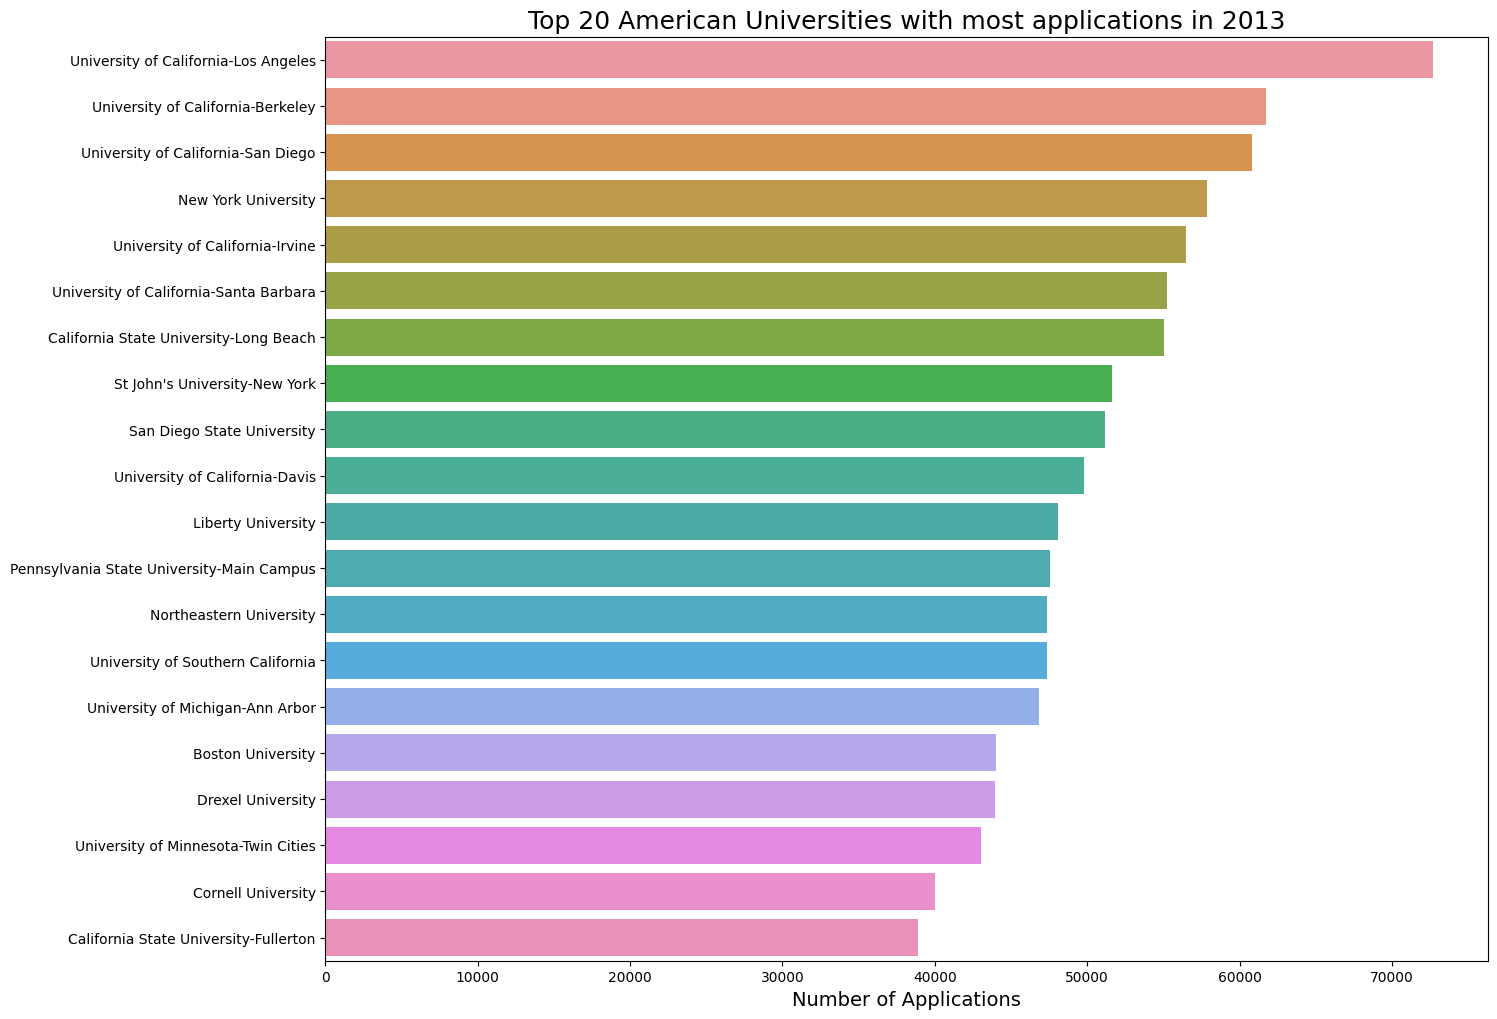

In [29]:
plt.figure(figsize=(15, 12))

sns.barplot(x='Applicants total', y='Name', data=top_20)
plt.xlabel('Number of Applications', fontsize=14)
plt.ylabel('')
plt.title('Top 20 American Universities with most applications in 2013', fontsize=18)
plt.savefig('img/barplot1.png')

In [30]:
df_uni.columns

Index(['Name', 'year', 'Highest degree offered', 'Offers Bachelor's degree',
       'Offers Master's degree',
       'Offers Doctor's degree - research/scholarship',
       'Offers Doctor's degree - professional practice', 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 'Total  enrollment',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 yea

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\P

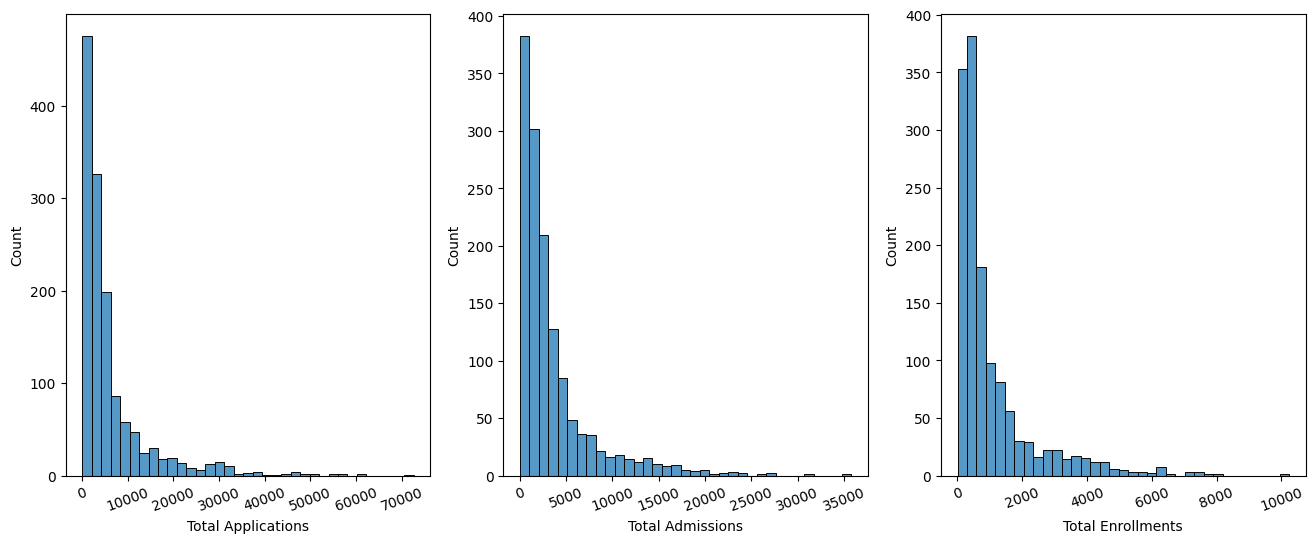

In [31]:
plt.figure(figsize=(16, 6))

plt.subplot(131)
sns.histplot(df_uni['Applicants total'], bins=35)
plt.xticks(rotation=20)
plt.xlabel('Total Applications')

plt.subplot(132)
sns.histplot(df_uni['Admissions total'], bins=35)
plt.xticks(rotation=20)
plt.xlabel('Total Admissions')

plt.subplot(133)
sns.histplot(df_uni['Enrolled total'], bins=35)
plt.xticks(rotation=20)
plt.xlabel('Total Enrollments')

plt.savefig('img/barplot2.png')

- Most of the universitites receieved less than 5000 applications in the year 2013. However, there were some universities that received as many as 70000 in the same year.
- Most of the universities admitted around less than 2000 students
- However, the enrollments are even lower than admissions

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-pa

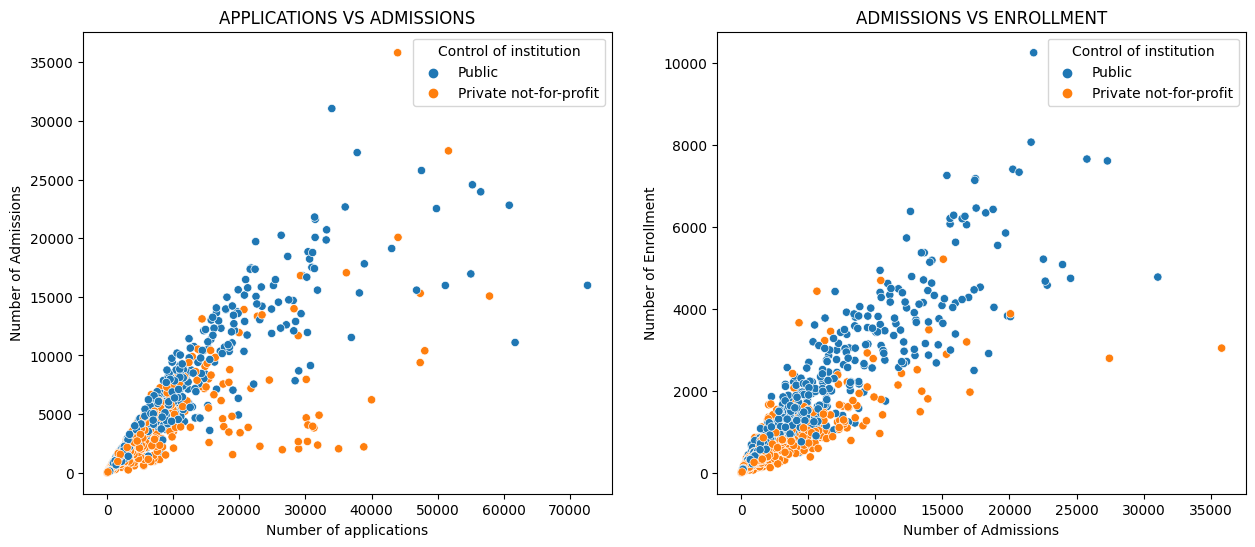

In [32]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.scatterplot(x=df_uni['Applicants total'], y=df_uni['Admissions total'], hue=df_uni['Control of institution'])
plt.xlabel('Number of applications')
plt.ylabel('Number of Admissions')
plt.title('APPLICATIONS VS ADMISSIONS')

plt.subplot(122)
sns.scatterplot(x=df_uni['Admissions total'], y=df_uni['Enrolled total'], hue=df_uni['Control of institution'])
plt.xlabel('Number of Admissions')
plt.ylabel('Number of Enrollment')
plt.title('ADMISSIONS VS ENROLLMENT')

plt.savefig('img/scatterplot1.png')

- From the left figure, 
    - As the number of appliations increase, the total number of admissions also increase and vice versa.
    - However, the universities with highest number of applications are not the ones with highest number of admissions
    
- From the right figure,
    - The total enrollment increases with admission.
    - Again, the universities with highest number of admissions are not the ones with highest number of enrollment

In [33]:
df_uni['Acceptance_Rate'] = ((df_uni['Admissions total'] / df_uni['Applicants total']) * 100).round(2)

In [34]:
df_uni['Enrollment_Rate'] = ((df_uni['Enrolled total'] / df_uni['Admissions total']) * 100).round(2)

In [35]:
df_uni.head()

,Name,year,Highest degree offered,Offers Bachelor's degree,Offers Master's degree,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Applicants total,Admissions total,Enrolled total,...,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total",Acceptance_Rate,Enrollment_Rate
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,5521.0,1104.0,...,3799.0,252.0,55.0,51.0,69.0,10.0,23.0,29.0,89.89,20.00
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,4934.0,1773.0,...,8357.0,3145.0,61.0,58.0,64.0,29.0,46.0,53.0,86.73,35.93
2,Amridge University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,...,202.0,120.0,58.0,61.0,55.0,NaN,NaN,67.0,NaN,NaN
3,University of Alabama in Huntsville,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.0,1656.0,651.0,...,4237.0,1459.0,44.0,44.0,43.0,16.0,37.0,48.0,80.62,39.31
4,Alabama State University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.0,5251.0,1479.0,...,4872.0,484.0,61.0,59.0,71.0,9.0,19.0,25.0,51.25,28.17


D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


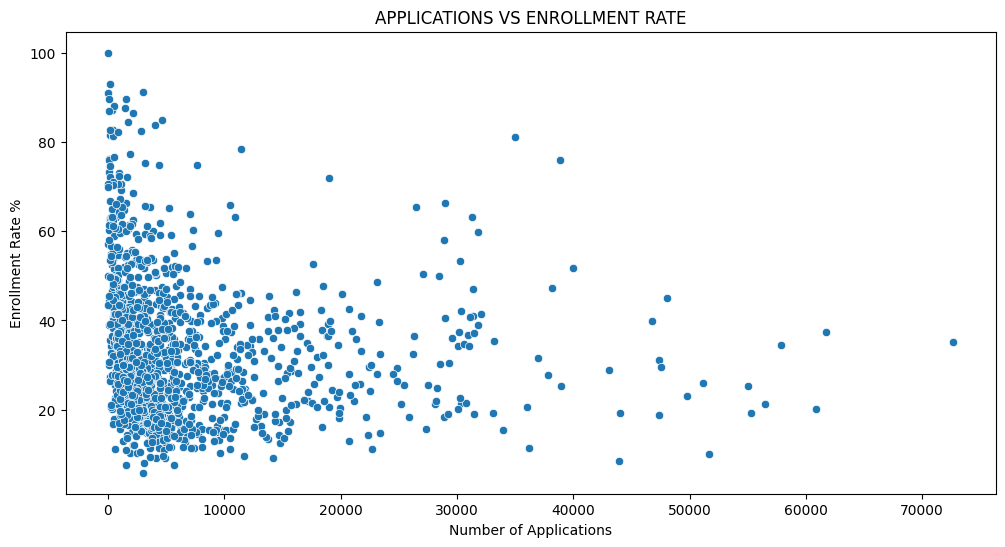

In [36]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Applicants total',y='Enrollment_Rate',data=df_uni)
plt.title('APPLICATIONS VS ENROLLMENT RATE')
plt.ylabel('Enrollment Rate %')
plt.xlabel('Number of Applications')
plt.savefig('img/scatterplot2.png')

- With a few exceptions, universities with lower number of applications have higher enrollment rate

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-pa

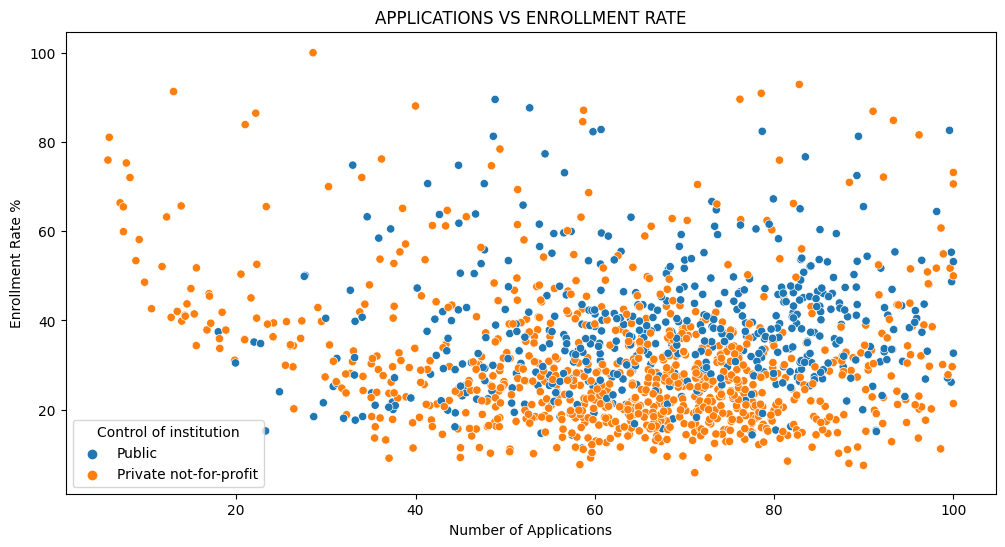

In [37]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Acceptance_Rate',y='Enrollment_Rate',data=df_uni, hue='Control of institution')
plt.title('APPLICATIONS VS ENROLLMENT RATE')
plt.ylabel('Enrollment Rate %')
plt.xlabel('Number of Applications');
plt.savefig('img/scatterplot3.png')

In [38]:
# ------------------------------- 

In [39]:
high_acceptance_rate = df_uni[df_uni['Acceptance_Rate'].notnull()][['Name', 'Acceptance_Rate', 'Enrollment_Rate']].sort_values(by='Acceptance_Rate', ascending=False).head(20)

In [40]:
high_acceptance_rate

,Name,Acceptance_Rate,Enrollment_Rate
451,University of Pikeville,100.00,21.40
633,Metropolitan State University,100.00,32.68
1479,Brandman University,100.00,70.59
95,Coleman University,100.00,73.17
1343,Goddard College,100.00,50.00
709,Montana State University-Northern,100.00,53.19
1385,Southern Virginia University,99.87,29.66
1313,The University of Texas at El Paso,99.81,48.70
281,Lewis-Clark State College,99.77,55.30
799,College of Staten Island CUNY,99.75,26.19


In [41]:
low_acceptance_rate = df_uni[df_uni['Acceptance_Rate'].notnull()][['Name', 'Acceptance_Rate', 'Enrollment_Rate']].sort_values(by='Acceptance_Rate', ascending=True).head(20)

In [42]:
low_acceptance_rate

,Name,Acceptance_Rate,Enrollment_Rate
1469,Stanford University,5.69,75.95
544,Harvard University,5.84,81.05
179,Yale University,7.05,66.37
760,Princeton University,7.41,65.46
793,Columbia University in the City of New York,7.42,59.91
795,Cooper Union for the Advancement of Science an...,7.74,75.30
551,Massachusetts Institute of Technology,8.15,72.03
289,University of Chicago,8.81,53.41
1172,Brown University,9.18,58.14
734,Dartmouth College,9.78,48.58


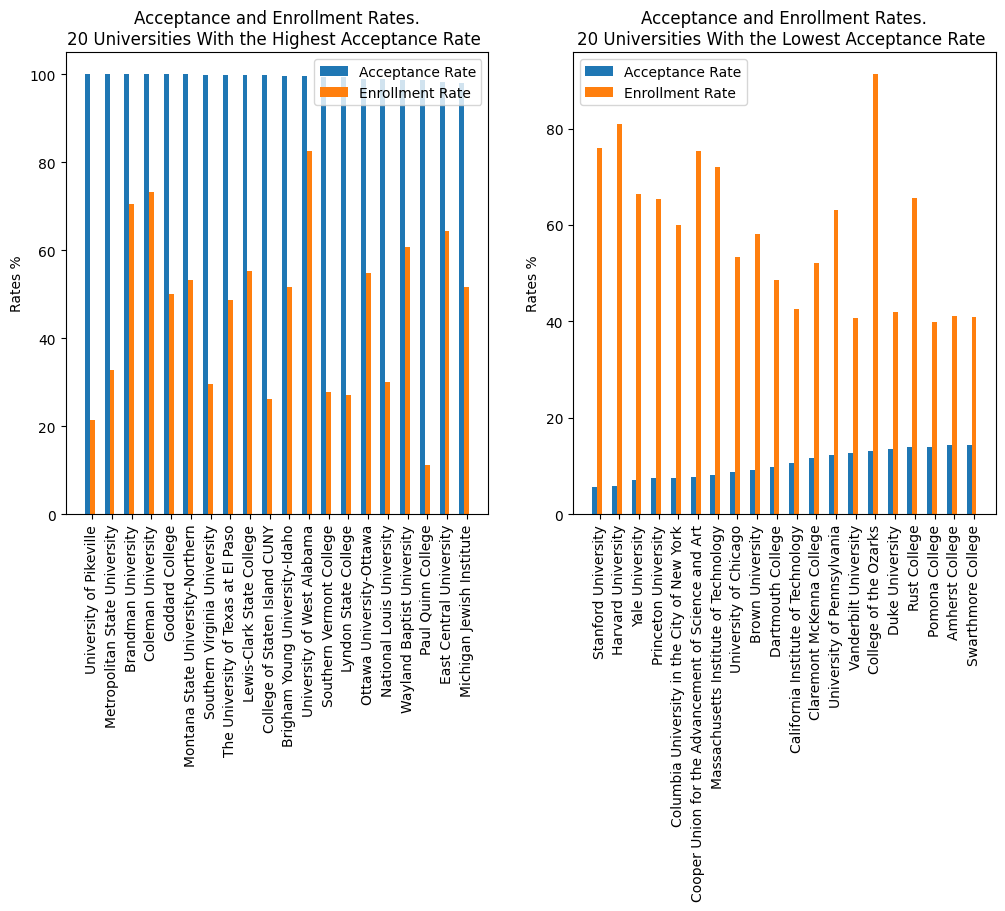

In [43]:
plt.figure(figsize=(12,6))
plt.subplot(121)
x = np.arange(len(high_acceptance_rate))
width = 0.25
plt.bar(x, high_acceptance_rate['Acceptance_Rate'], 0.25, label='Acceptance Rate')
plt.bar(x+width, high_acceptance_rate['Enrollment_Rate'], width, label='Enrollment Rate')
plt.title('''Acceptance and Enrollment Rates.
20 Universities With the Highest Acceptance Rate ''')
plt.ylabel('Rates %')
plt.xticks(x+width, high_acceptance_rate.Name.values, rotation=90)
plt.legend(loc='best')


plt.subplot(122)
y = np.arange(len(low_acceptance_rate))
plt.bar(y, low_acceptance_rate['Acceptance_Rate'], width, label='Acceptance Rate')
plt.bar(y+width, low_acceptance_rate['Enrollment_Rate'], width, label='Enrollment Rate')
plt.title('''Acceptance and Enrollment Rates.
20 Universities With the Lowest Acceptance Rate ''')
plt.ylabel('Rates %')
plt.xticks(y + width,low_acceptance_rate.Name.values,rotation=90 )
plt.legend(loc='best');

plt.savefig('img/barplot3.png')

In [44]:
df_uni['Control of institution'].unique()

array(['Public', 'Private not-for-profit'], dtype=object)

In [45]:
uni_pub = df_uni[df_uni['Control of institution'] == 'Public']
uni_pub.head()

,Name,year,Highest degree offered,Offers Bachelor's degree,Offers Master's degree,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Applicants total,Admissions total,Enrolled total,...,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total",Acceptance_Rate,Enrollment_Rate
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,5521.0,1104.0,...,3799.0,252.0,55.0,51.0,69.0,10.0,23.0,29.0,89.89,20.00
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,4934.0,1773.0,...,8357.0,3145.0,61.0,58.0,64.0,29.0,46.0,53.0,86.73,35.93
3,University of Alabama in Huntsville,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.0,1656.0,651.0,...,4237.0,1459.0,44.0,44.0,43.0,16.0,37.0,48.0,80.62,39.31
4,Alabama State University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.0,5251.0,1479.0,...,4872.0,484.0,61.0,59.0,71.0,9.0,19.0,25.0,51.25,28.17
5,The University of Alabama,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,30975.0,17515.0,6454.0,...,26548.0,2892.0,55.0,54.0,58.0,43.0,62.0,67.0,56.55,36.85


In [46]:
uni_private = df_uni[df_uni['Control of institution'] == 'Private not-for-profit']
uni_private.head()

,Name,year,Highest degree offered,Offers Bachelor's degree,Offers Master's degree,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Applicants total,Admissions total,Enrolled total,...,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total",Acceptance_Rate,Enrollment_Rate
2,Amridge University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,...,202.0,120.0,58.0,61.0,55.0,NaN,NaN,67.0,NaN,NaN
9,Birmingham Southern College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,1931.0,1240.0,356.0,...,1167.0,21.0,46.0,46.0,NaN,53.0,60.0,62.0,64.22,28.71
10,Concordia College Alabama,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,NaN,NaN,NaN,...,543.0,57.0,42.0,42.0,NaN,10.0,14.0,14.0,NaN,NaN
11,Faulkner University,2013,Doctor's degree - professional practice,Yes,Yes,Implied no,Yes,NaN,NaN,NaN,...,1803.0,814.0,62.0,63.0,58.0,11.0,21.0,23.0,NaN,NaN
12,Huntingdon College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,1470.0,923.0,261.0,...,902.0,208.0,50.0,50.0,NaN,30.0,40.0,43.0,62.79,28.28


D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


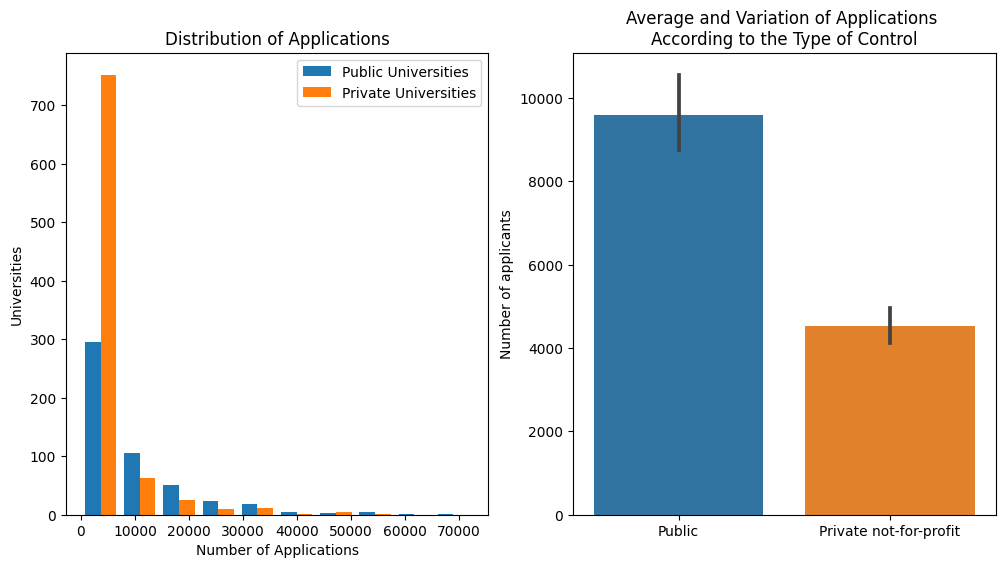

In [47]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.hist([uni_pub['Applicants total'], uni_private['Applicants total']])
plt.title('Distribution of Applications')
plt.xlabel('Number of Applications')
plt.ylabel('Universities')
plt.legend(['Public Universities', 'Private Universities'])

plt.subplot(122)
sns.barplot(x=df_uni['Control of institution'], y=df_uni['Applicants total'])
plt.title('''Average and Variation of Applications 
According to the Type of Control''')
plt.ylabel('Number of applicants')
plt.xlabel('')

plt.savefig('img/barplot4.png')

In [48]:
print('Minimum number of applications for public universities: ', int(uni_pub['Applicants total'].min()))
print('Minimum number of applications for private universities: ', int(uni_private['Applicants total'].min()))

Minimum number of applications for public universities:  193
Minimum number of applications for private universities:  4


In [49]:
print('Maximum number of applications for public universities: ', int(uni_pub['Applicants total'].max()))
print('Maximum number of applications for private universities: ', int(uni_private['Applicants total'].max()))

Maximum number of applications for public universities:  72676
Maximum number of applications for private universities:  57845


D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-pa

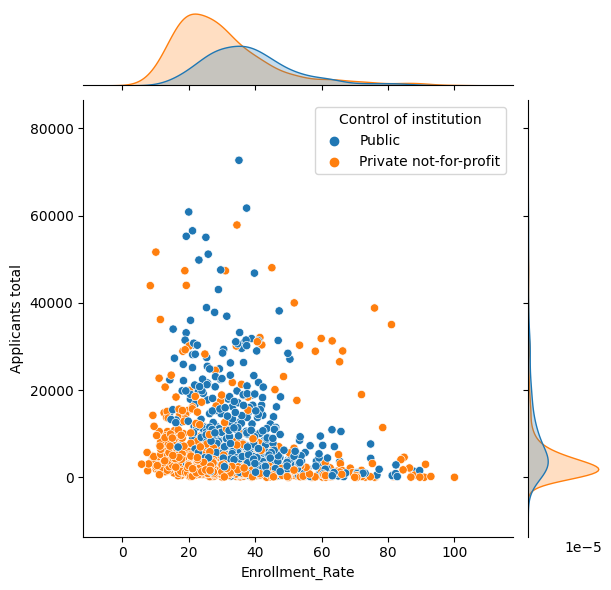

In [50]:
sns.jointplot(x=df_uni['Enrollment_Rate'], y=df_uni['Applicants total'], hue=df_uni['Control of institution'])
plt.savefig('img/jointplot.png')

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-pa

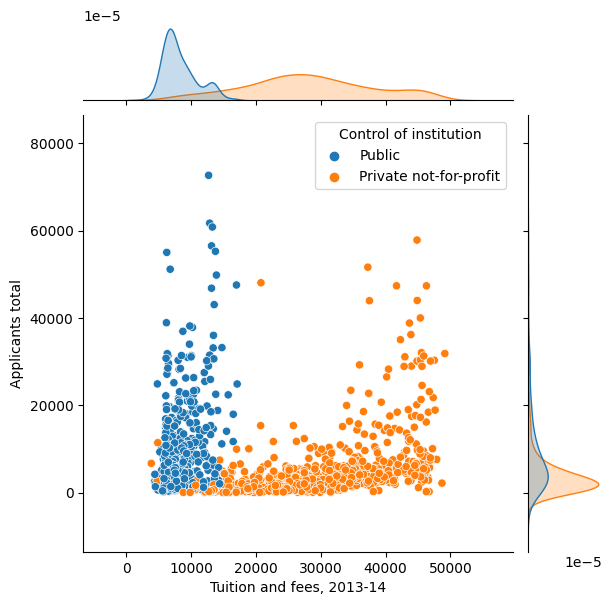

In [51]:
sns.jointplot(x=df_uni['Tuition and fees, 2013-14'], y=df_uni['Applicants total'], hue=df_uni['Control of institution'])
plt.savefig('img/jointplot2.png')

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-pa

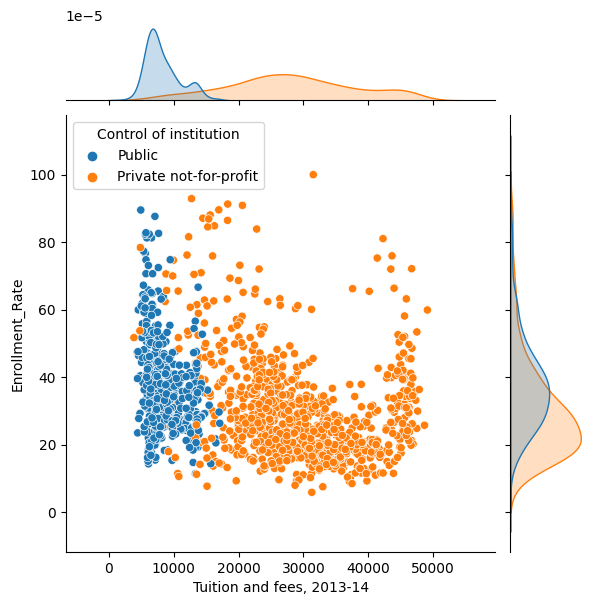

In [52]:
sns.jointplot(x=df_uni['Tuition and fees, 2013-14'], y=df_uni['Enrollment_Rate'], hue=df_uni['Control of institution'])
plt.savefig('img/jointplot3.png')

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-pa

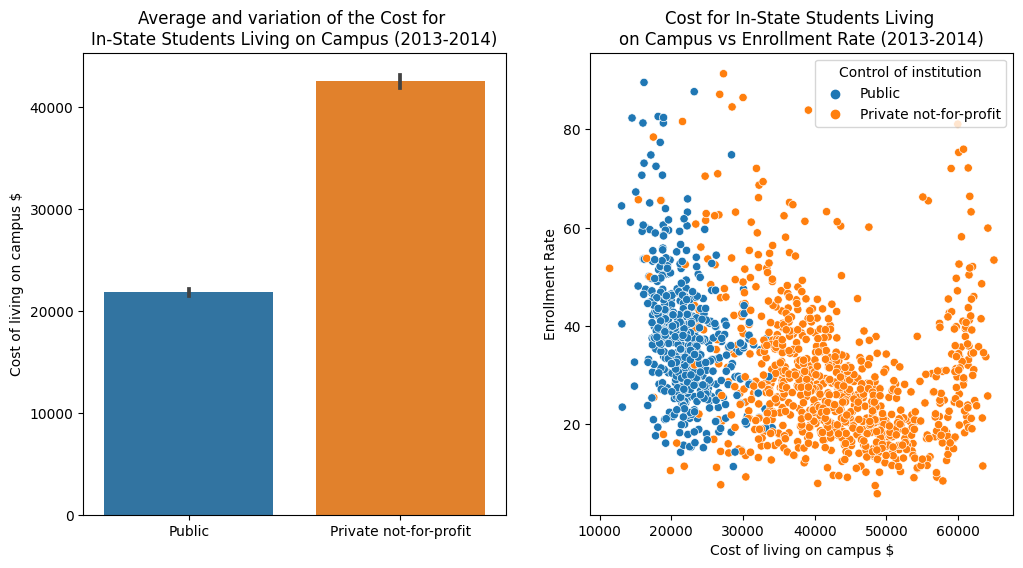

In [53]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.barplot(x=df_uni['Control of institution'], y=df_uni['Total price for in-state students living on campus 2013-14'])
plt.title('''Average and variation of the Cost for 
In-State Students Living on Campus (2013-2014)''')        
plt.xlabel('')
plt.ylabel('Cost of living on campus $')


plt.subplot(122)
sns.scatterplot(x=df_uni['Total price for in-state students living on campus 2013-14'], y=df_uni['Enrollment_Rate'], hue=df_uni['Control of institution'])
plt.title('''Cost for In-State Students Living 
on Campus vs Enrollment Rate (2013-2014)''')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')
plt.savefig('img/barplot5.png')

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-pa

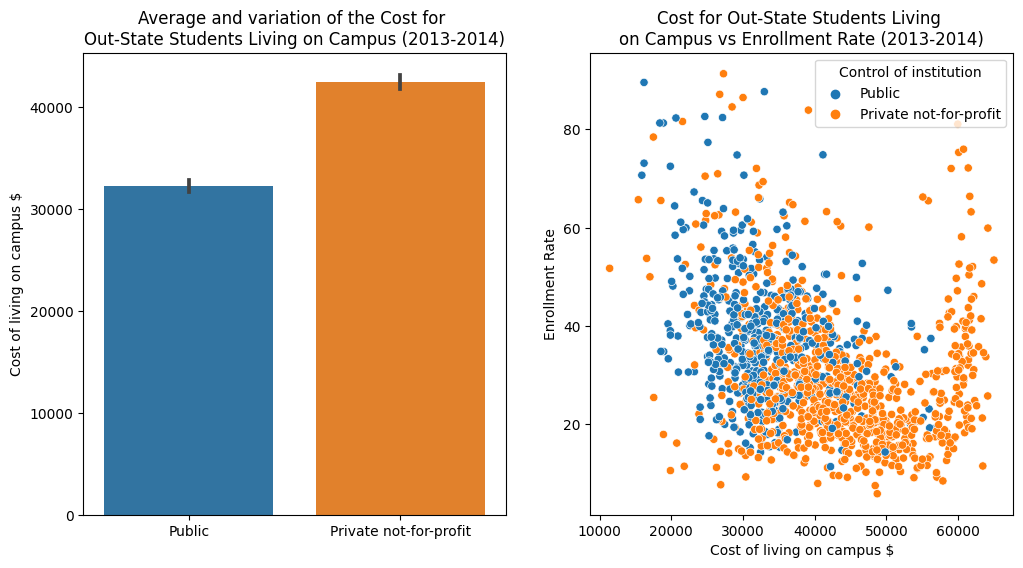

In [54]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.barplot(x=df_uni['Control of institution'], y=df_uni['Total price for out-of-state students living on campus 2013-14'])
plt.title('''Average and variation of the Cost for 
Out-State Students Living on Campus (2013-2014)''')        
plt.xlabel('')
plt.ylabel('Cost of living on campus $')


plt.subplot(122)
sns.scatterplot(x=df_uni['Total price for out-of-state students living on campus 2013-14'], y=df_uni['Enrollment_Rate'], hue=df_uni['Control of institution'])
plt.title('''Cost for Out-State Students Living 
on Campus vs Enrollment Rate (2013-2014)''')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')
plt.savefig('img/barplot6.png')

In [55]:
df_uni.columns.to_list()

['Name',
 'year',
 'Highest degree offered',
 "Offers Bachelor's degree",
 "Offers Master's degree",
 "Offers Doctor's degree - research/scholarship",
 "Offers Doctor's degree - professional practice",
 'Applicants total',
 'Admissions total',
 'Enrolled total',
 'Estimated enrollment, total',
 'Tuition and fees, 2013-14',
 'Total price for in-state students living on campus 2013-14',
 'Total price for out-of-state students living on campus 2013-14',
 'State abbreviation',
 'Control of institution',
 'Total  enrollment',
 'Full-time enrollment',
 'Part-time enrollment',
 'Undergraduate enrollment',
 'Graduate enrollment',
 'Full-time undergraduate enrollment',
 'Part-time undergraduate enrollment',
 'Percent of total enrollment that are women',
 'Percent of undergraduate enrollment that are women',
 'Percent of graduate enrollment that are women',
 'Graduation rate - Bachelor degree within 4 years, total',
 'Graduation rate - Bachelor degree within 5 years, total',
 'Graduation rate - 

In [56]:
in_state = df_uni[['Name', 'Enrollment_Rate', 'Control of institution', 'Total price for in-state students living on campus 2013-14']]

In [57]:
in_state = in_state.rename(columns={'Total price for in-state students living on campus 2013-14':'price_living'})
in_state['from'] = 'In-state'

In [58]:
in_state.head()

,Name,Enrollment_Rate,Control of institution,price_living,from
0,Alabama A & M University,20.00,Public,21849.0,In-state
1,University of Alabama at Birmingham,35.93,Public,22495.0,In-state
2,Amridge University,NaN,Private not-for-profit,NaN,In-state
3,University of Alabama in Huntsville,39.31,Public,23466.0,In-state
4,Alabama State University,28.17,Public,18286.0,In-state


In [59]:
out_state = df_uni[['Name', 'Enrollment_Rate', 'Control of institution', 'Total price for out-of-state students living on campus 2013-14']]

In [60]:
out_state = out_state.rename(columns={'Total price for out-of-state students living on campus 2013-14': 'price_living'})
out_state['from'] = 'Out-State'

In [61]:
out_state.head()

,Name,Enrollment_Rate,Control of institution,price_living,from
0,Alabama A & M University,20.00,Public,27441.0,Out-State
1,University of Alabama at Birmingham,35.93,Public,31687.0,Out-State
2,Amridge University,NaN,Private not-for-profit,NaN,Out-State
3,University of Alabama in Huntsville,39.31,Public,35780.0,Out-State
4,Alabama State University,28.17,Public,25222.0,Out-State


In [62]:
in_out_state = pd.concat([in_state, out_state], ignore_index=True)

In [63]:
in_out_state.head()

,Name,Enrollment_Rate,Control of institution,price_living,from
0,Alabama A & M University,20.00,Public,21849.0,In-state
1,University of Alabama at Birmingham,35.93,Public,22495.0,In-state
2,Amridge University,NaN,Private not-for-profit,NaN,In-state
3,University of Alabama in Huntsville,39.31,Public,23466.0,In-state
4,Alabama State University,28.17,Public,18286.0,In-state


D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-pa

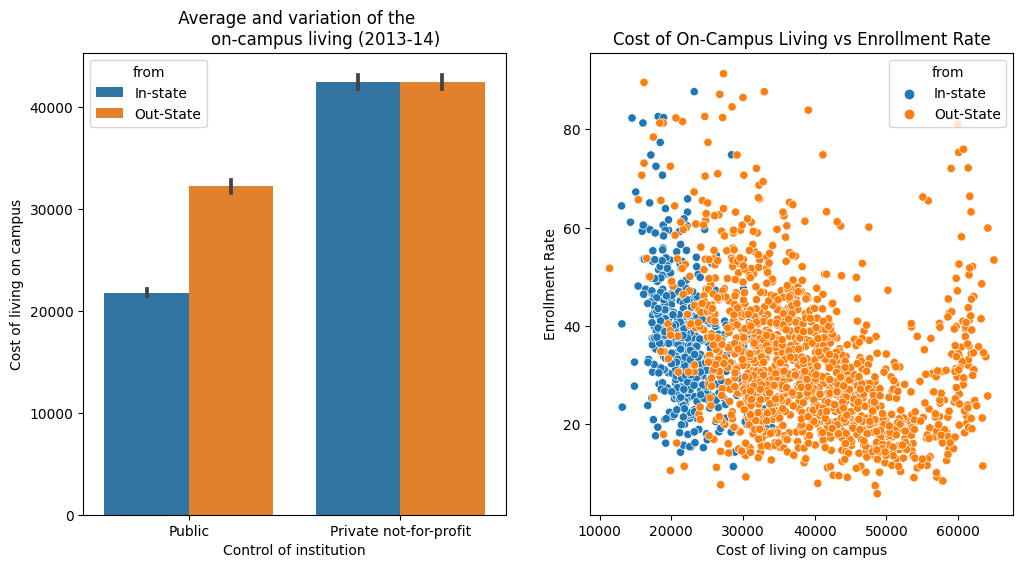

In [64]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.barplot(x=in_out_state['Control of institution'], y=in_out_state['price_living'], hue=in_out_state['from'])
plt.ylabel('Cost of living on campus')
plt.title(''' Average and variation of the
            on-campus living (2013-14)''')

plt.subplot(122)
sns.scatterplot(x=in_out_state['price_living'], y=in_out_state['Enrollment_Rate'], hue=in_out_state['from'])
plt.xlabel('Cost of living on campus')
plt.ylabel('Enrollment Rate')
plt.title('Cost of On-Campus Living vs Enrollment Rate')

plt.savefig('img/barplot7.png')

In [65]:
df.columns.to_list()

['ID number',
 'Name',
 'year',
 'ZIP code',
 'Highest degree offered',
 'County name',
 'Longitude location of institution',
 'Latitude location of institution',
 'Religious affiliation',
 'Offers Less than one year certificate',
 'Offers One but less than two years certificate',
 "Offers Associate's degree",
 'Offers Two but less than 4 years certificate',
 "Offers Bachelor's degree",
 'Offers Postbaccalaureate certificate',
 "Offers Master's degree",
 "Offers Post-master's certificate",
 "Offers Doctor's degree - research/scholarship",
 "Offers Doctor's degree - professional practice",
 "Offers Doctor's degree - other",
 'Offers Other degree',
 'Applicants total',
 'Admissions total',
 'Enrolled total',
 'Percent of freshmen submitting SAT scores',
 'Percent of freshmen submitting ACT scores',
 'SAT Critical Reading 25th percentile score',
 'SAT Critical Reading 75th percentile score',
 'SAT Math 25th percentile score',
 'SAT Math 75th percentile score',
 'SAT Writing 25th percentil

In [66]:
df_uni['Highest degree offered'].value_counts()

Highest degree offered
Master's degree                                                     587
Doctor's degree - research/scholarship and professional practice    311
Bachelor's degree                                                   282
Doctor's degree - research/scholarship                              201
Doctor's degree -  professional practice                            124
Doctor's degree - other                                              28
Name: count, dtype: int64

In [67]:
degrees = ['Master\'s degree',
          'Doctor\'s degree - research/scholarship and professional practice',
          'Bachelor\'s degree',
          'Doctor\'s degree - research/scholarship',
          'Doctor\'s degree -  professional practice',
          'Doctor\'s degree - other'
        ]

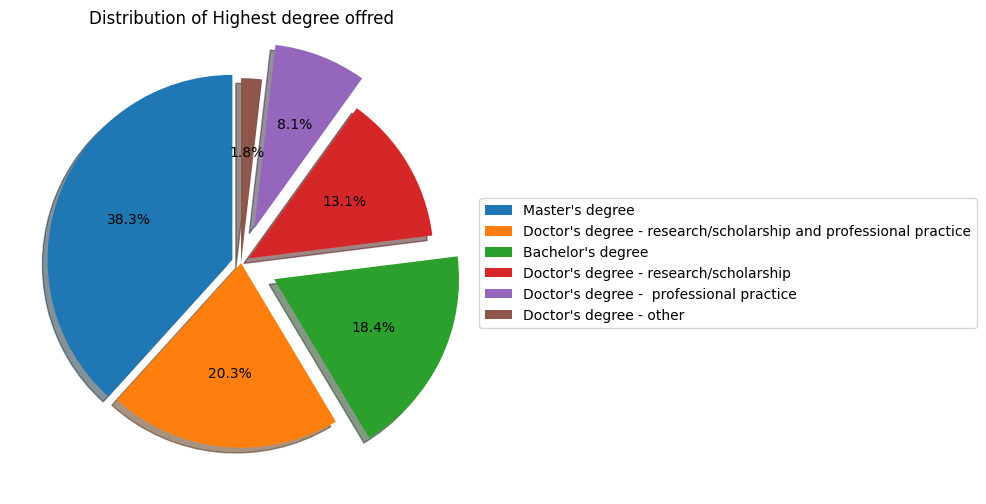

In [68]:
plt.figure(figsize=(12, 6))
plt.pie(df_uni['Highest degree offered'].value_counts(), startangle=90, explode=[0.05, 0.0, 0.2, 0.05, 0.2, 0.0], shadow=True,  autopct='%.1f%%')
plt.title('Distribution of Highest degree offred')
plt.legend(degrees, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.savefig('img/piechart.png')

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


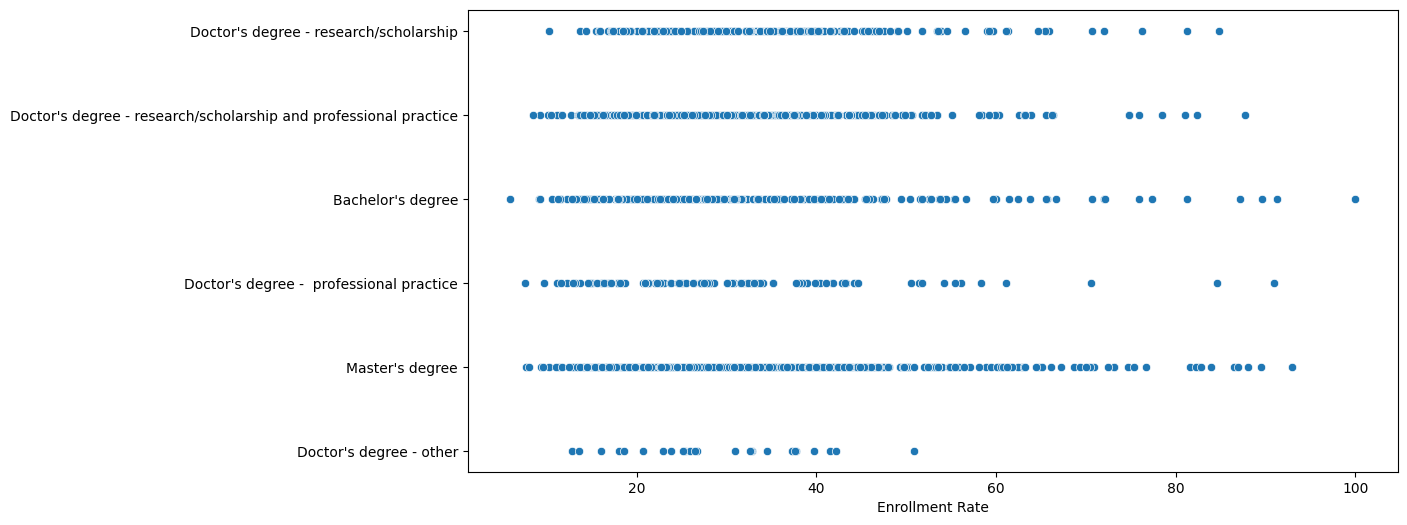

In [69]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x=df_uni['Enrollment_Rate'], y=df_uni['Highest degree offered'])
plt.ylabel('')
plt.xlabel('Enrollment Rate')

plt.savefig('img/scatterplot4.png')